In [1]:

import pandas as pd
import numpy as np
#reading the preprocessed diamond dataset
df_4=pd.DataFrame(pd.read_csv("diamond_preprocessed_4.csv"))
df_4

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,cut_numeric,clarity_numeric
0,1.0,0.23,ideal,e,si2,61.50,55.00,326.0,3.95,3.98,2,3
1,2.0,0.21,premium,e,si1,59.80,61.00,326.0,3.89,3.84,3,2
2,3.0,0.23,good,e,vs1,61.75,57.46,327.0,4.05,4.07,1,4
3,4.0,0.29,premium,i,vs2,62.40,58.00,334.0,4.20,4.23,3,5
4,5.0,0.31,good,j,si2,63.30,58.00,335.0,4.34,4.35,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936.0,0.72,ideal,d,si1,60.80,57.00,2757.0,5.75,5.76,2,2
53936,53937.0,0.72,good,d,si1,63.10,55.00,2757.0,5.69,5.75,1,2
53937,53938.0,0.70,very good,d,si1,62.80,60.00,2757.0,5.66,5.68,4,2
53938,53939.0,0.86,premium,h,si2,61.00,58.00,2757.0,6.15,6.12,3,3


In [2]:

df_cleaned = df_4.drop(columns=['cut', 'color', 'clarity','Unnamed: 0'])

# Applying One-hot Encoding on clarity_numeric
df_cleaned= pd.get_dummies(df_cleaned, columns=[ 'clarity_numeric'], dtype=int)
df_cleaned


,carat,depth,table,price,x,y,cut_numeric,clarity_numeric_0,clarity_numeric_1,clarity_numeric_2,clarity_numeric_3,clarity_numeric_4,clarity_numeric_5,clarity_numeric_6,clarity_numeric_7
0,0.23,61.50,55.00,326.0,3.95,3.98,2,0,0,0,1,0,0,0,0
1,0.21,59.80,61.00,326.0,3.89,3.84,3,0,0,1,0,0,0,0,0
2,0.23,61.75,57.46,327.0,4.05,4.07,1,0,0,0,0,1,0,0,0
3,0.29,62.40,58.00,334.0,4.20,4.23,3,0,0,0,0,0,1,0,0
4,0.31,63.30,58.00,335.0,4.34,4.35,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.80,57.00,2757.0,5.75,5.76,2,0,0,1,0,0,0,0,0
53936,0.72,63.10,55.00,2757.0,5.69,5.75,1,0,0,1,0,0,0,0,0
53937,0.70,62.80,60.00,2757.0,5.66,5.68,4,0,0,1,0,0,0,0,0
53938,0.86,61.00,58.00,2757.0,6.15,6.12,3,0,0,0,1,0,0,0,0


In [20]:

X = df_cleaned.drop(columns=['cut_numeric']).values  # Input features
#considering cut numeric as the target
Y = df_cleaned['cut_numeric'].values  # Target 
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
train_size = int(0.8 * X.shape[0])
#splitting the data (80 percent for training and 20 percent for testing)
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = X[train_indices]
Y_train = Y[train_indices]
X_test = X[test_indices]
Y_test = Y[test_indices]
#printing the shapes of training and test datasets
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

# Step 4: Normalizing features from the training set after the splitting process
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)

X_train_normalized = (X_train - X_train_mean) / X_train_std
X_test_normalized = (X_test - X_train_mean) / X_train_std


(43152, 14)
(43152,)
(10788, 14)
(10788,)


In [5]:

#Using softmax function as the cut_nemric represents categorical data which is numerical form
def softmax(z1):
    exp_z = np.exp(z1 - np.max(z1, axis=1, keepdims=True))
    a=exp_z / np.sum(exp_z, axis=1, keepdims=True)
    return a;

def compute_multiclass_loss(X, Y, W, lambda1, lambda2):
    n = len(Y)
    Z1 = X @ W
    A = softmax(Z1)
    
    # Cross Entropy Loss
    log_l = -np.log(A[range(n), Y.astype(int)])  # Y represents class indices
    loss_mc = np.sum(log_l) / n
    
    # Elastic Net regularization
    l2_p = (lambda1 / (2 * n)) * np.sum(W ** 2)  # L2 (Ridge)
    l1_p = lambda2 * np.sum(np.abs(W))  # L1 (Lasso)
    loss_mc += l2_p + l1_p
    
    return loss_mc



def gradient_descent_multiclass(X, Y, W, alpha, lambda1, lambda2, n_iterations, n_classes, print_interval, gradient_threshold=None):
    m = len(Y)
    loss_list = []
    for i in range(n_iterations):
        Z = X @ W
        A = softmax(Z)
        
        # Gradient of cross-entropy loss
        A[range(m), Y.astype(int)] -= 1  
        g = X.T @ A / m
        
        # Regularization 
        g += lambda1 * W  # L2 regularization term
        g += lambda2 * np.sign(W)  # L1 regularization term (subgradient)
        
        # Update weights
        W -= alpha * g
        
        # Early stopping based on gradient magnitude
        if gradient_threshold is not None and np.linalg.norm(g) < gradient_threshold:
            print(f"Stopped early at iteration {i} due to gradient threshold value.")
            break

        # Print the loss at specified intervals
        if i % print_interval == 0:
            loss_mc = compute_multiclass_loss(X, Y, W, lambda1, lambda2)
            loss_list.append(loss_mc)
            print(f"The loss at Iteration {i} is {loss_mc}")
    
    return W, loss_list
    
def predict(X, W):
    return X @ W

# Xavier Initialization
def xavier_initialization(input_dim, output_dim):
    limit = np.sqrt(6 / (input_dim + output_dim))
    xi=np.random.uniform(-limit, limit, size=(input_dim, output_dim))
    return xi

#hyperparameters
alpha = 0.001  # Learning rate
lambda1 = 0.01 
lambda2 = 0.01 
n_i = 30001  
print_interval = 3000 

# Number of classes and features
n_classes = len(np.unique(Y_train)) 
input_d = X_train_normalized.shape[1]  # Number of features



In [6]:
print("Losses with Random Initialization & without early stopping")
W_random = np.random.randn(input_d, n_classes)
W_random_trained, random_loss = gradient_descent_multiclass(X_train_normalized, Y_train, W_random, alpha, lambda1, lambda2, n_i, n_classes, print_interval)
print(random_loss)





Losses with Random Initialization & without early stopping
The loss at Iteration 0 is 5.240015403814936
The loss at Iteration 3000 is 3.405876982952782
The loss at Iteration 6000 is 2.5235898657021822
The loss at Iteration 9000 is 2.07598677902291
The loss at Iteration 12000 is 1.8157707758966106
The loss at Iteration 15000 is 1.6492243662987989
The loss at Iteration 18000 is 1.5491129136131487
The loss at Iteration 21000 is 1.4901116548978548
The loss at Iteration 24000 is 1.4548317139349447
The loss at Iteration 27000 is 1.4295823135981671
The loss at Iteration 30000 is 1.4098873141850192
[np.float64(5.240015403814936), np.float64(3.405876982952782), np.float64(2.5235898657021822), np.float64(2.07598677902291), np.float64(1.8157707758966106), np.float64(1.6492243662987989), np.float64(1.5491129136131487), np.float64(1.4901116548978548), np.float64(1.4548317139349447), np.float64(1.4295823135981671), np.float64(1.4098873141850192)]


In [7]:
print("Losses with Zero Initialization & without early stopping")
W_zero = np.zeros((input_d, n_classes))
W_zero_trained, zero_loss = gradient_descent_multiclass(X_train_normalized, Y_train, W_zero, alpha, lambda1, lambda2, n_i, n_classes, print_interval)
print(zero_loss)

Losses with Zero Initialization & without early stopping
The loss at Iteration 0 is 1.6092996299586722
The loss at Iteration 3000 is 1.4233266745406428
The loss at Iteration 6000 is 1.3653503897500006
The loss at Iteration 9000 is 1.340529204914077
The loss at Iteration 12000 is 1.328228502927125
The loss at Iteration 15000 is 1.3215359076748827
The loss at Iteration 18000 is 1.317631442866184
The loss at Iteration 21000 is 1.3152310482311573
The loss at Iteration 24000 is 1.3136909403280932
The loss at Iteration 27000 is 1.3126692384519774
The loss at Iteration 30000 is 1.3119663804217014
[np.float64(1.6092996299586722), np.float64(1.4233266745406428), np.float64(1.3653503897500006), np.float64(1.340529204914077), np.float64(1.328228502927125), np.float64(1.3215359076748827), np.float64(1.317631442866184), np.float64(1.3152310482311573), np.float64(1.3136909403280932), np.float64(1.3126692384519774), np.float64(1.3119663804217014)]


In [8]:
print("Losses with Xavier Initialization & without early stopping ")
W_xavier = xavier_initialization(input_d, n_classes)
W_xavier_trained, xavier_loss = gradient_descent_multiclass(X_train_normalized, Y_train, W_xavier, alpha, lambda1, lambda2, n_i, n_classes, print_interval)
print(xavier_loss)

Losses with Xavier Initialization & without early stopping 
The loss at Iteration 0 is 2.3949819537252313
The loss at Iteration 3000 is 1.654720921953676
The loss at Iteration 6000 is 1.4680478324237407
The loss at Iteration 9000 is 1.3996236840420992
The loss at Iteration 12000 is 1.36850253746599
The loss at Iteration 15000 is 1.3486153397503255
The loss at Iteration 18000 is 1.3347316533186036
The loss at Iteration 21000 is 1.3256205442047766
The loss at Iteration 24000 is 1.3191494273456397
The loss at Iteration 27000 is 1.3153169226572066
The loss at Iteration 30000 is 1.3130943998261293
[np.float64(2.3949819537252313), np.float64(1.654720921953676), np.float64(1.4680478324237407), np.float64(1.3996236840420992), np.float64(1.36850253746599), np.float64(1.3486153397503255), np.float64(1.3347316533186036), np.float64(1.3256205442047766), np.float64(1.3191494273456397), np.float64(1.3153169226572066), np.float64(1.3130943998261293)]


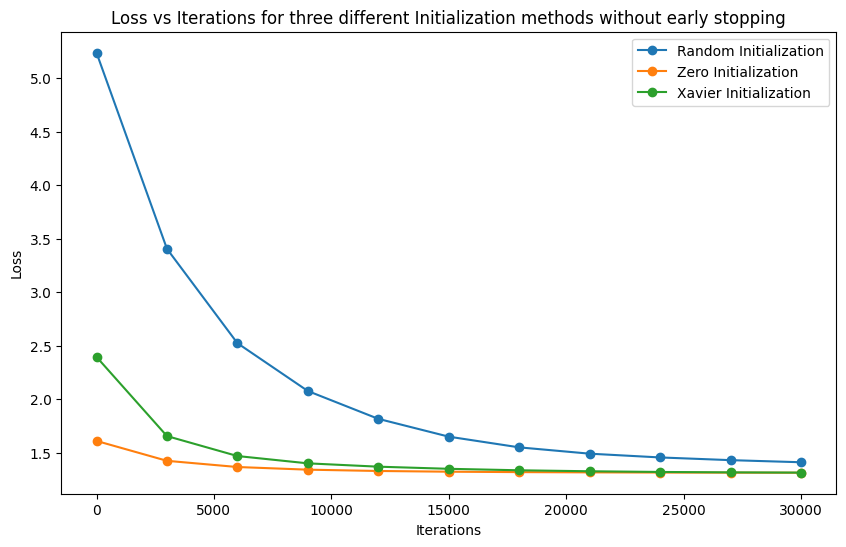

In [10]:
import matplotlib.pyplot as plt 

iterations = list(range(0, 30001, 3000))

plt.figure(figsize=(10, 6))

plt.plot(iterations, random_loss, label='Random Initialization', marker='o', color='#1f77b4')  # Blue
plt.plot(iterations, zero_loss, label='Zero Initialization', marker='o', color='#ff7f0e')  # Orange
plt.plot(iterations, xavier_loss, label='Xavier Initialization', marker='o', color='#2ca02c')  # Green

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations for three different Initialization methods without early stopping')
plt.legend()
plt.show()

In [11]:
gradient_threshold = 0.01

print("Losses with Random Initialization & early stopping")
W_random_es = np.random.randn(input_d, n_classes)
W_random_trained_es, random_loss_es = gradient_descent_multiclass(X_train_normalized, Y_train, W_random_es, alpha, lambda1, lambda2, n_i, n_classes, print_interval, gradient_threshold)
print(random_loss_es)

print("Losses with Zero Initialization & early stopping")
W_zero_es = np.zeros((input_d, n_classes))
W_zero_trained_es, zero_loss_es = gradient_descent_multiclass(X_train_normalized, Y_train, W_zero_es, alpha, lambda1, lambda2, n_i, n_classes, print_interval, gradient_threshold)
print(zero_loss_es)

print("Losses with Xavier Initialization and Early Stopping")
W_xavier_es = xavier_initialization(input_d, n_classes)
W_xavier_trained_es, xavier_loss_es = gradient_descent_multiclass(X_train_normalized, Y_train, W_xavier_es, alpha, lambda1, lambda2, n_i, n_classes, print_interval, gradient_threshold)
print(xavier_loss_es)

Losses with Random Initialization & early stopping
The loss at Iteration 0 is 5.510644744005643
The loss at Iteration 3000 is 3.027902971954231
The loss at Iteration 6000 is 2.0881885347500044
The loss at Iteration 9000 is 1.7487672925909492
The loss at Iteration 12000 is 1.5984053696369331
The loss at Iteration 15000 is 1.5213129269608556
The loss at Iteration 18000 is 1.4722796626852384
The loss at Iteration 21000 is 1.4373593386602221
The loss at Iteration 24000 is 1.4107172303353568
The loss at Iteration 27000 is 1.3896222067655337
The loss at Iteration 30000 is 1.3723784420824796
[np.float64(5.510644744005643), np.float64(3.027902971954231), np.float64(2.0881885347500044), np.float64(1.7487672925909492), np.float64(1.5984053696369331), np.float64(1.5213129269608556), np.float64(1.4722796626852384), np.float64(1.4373593386602221), np.float64(1.4107172303353568), np.float64(1.3896222067655337), np.float64(1.3723784420824796)]
Losses with Zero Initialization & early stopping
The loss

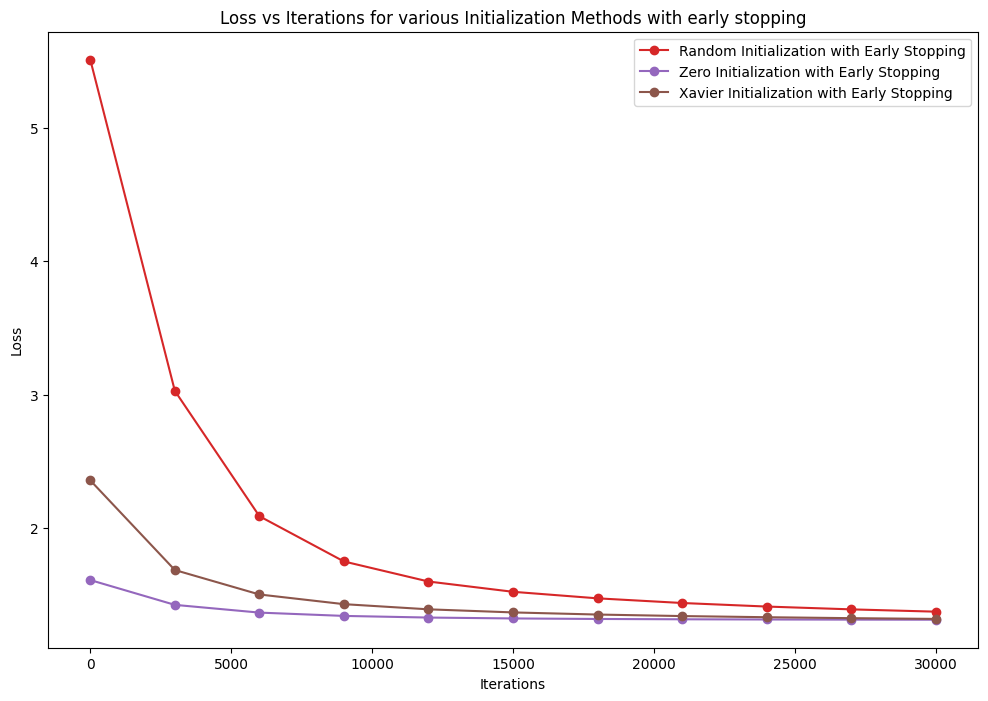

In [15]:
import matplotlib.pyplot as plt

iterations = list(range(0, 30001, 3000))

plt.figure(figsize=(12, 8))
plt.plot(iterations, random_loss_es, label='Random Initialization with Early Stopping', marker='o', color='#d62728')  # Red
plt.plot(iterations, zero_loss_es, label='Zero Initialization with Early Stopping', marker='o', color='#9467bd')  # Purple
plt.plot(iterations, xavier_loss_es, label='Xavier Initialization with Early Stopping', marker='o', color='#8c564b')  # Brown

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations for various Initialization Methods with early stopping')
plt.legend()
plt.show()


In [21]:
print(W_zero_trained_es)

[[ 5.34466320e-06 -3.16359342e-06 -1.77320637e-05  1.51719059e-05
  -1.42897194e-06]
 [-6.13437832e-06  4.01843563e-01 -4.07641273e-01 -2.33827354e-01
   1.29410239e-01]
 [-6.70432895e-07  1.62417596e-01 -1.57603329e+00  6.79095904e-01
   2.91293419e-01]
 [ 1.02259991e-05 -3.68875177e-07 -5.29899012e-06  4.12984634e-07
   6.86762057e-06]
 [ 9.47454773e-06  1.75105977e-06 -2.49467546e-02  8.38563744e-02
  -5.63309912e-06]
 [ 8.88483621e-06  4.38286890e-06 -1.97371196e-02  3.26729271e-06
   4.63195801e-08]
 [ 1.01780424e-01 -3.37937719e-07 -1.16632578e-02  1.61213679e-06
  -4.95628071e-03]
 [ 3.69937116e-06  9.05014381e-06  5.53622958e-02 -2.00878018e-03
   2.33671589e-06]
 [ 6.64664662e-06 -2.05252712e-07  2.67798782e-06  1.02694015e-07
   3.81809511e-06]
 [ 6.22413087e-06  5.94302752e-06 -1.45100348e-01  4.07871583e-06
  -4.62043139e-06]
 [-9.56178827e-06  4.00466329e-06  1.02229384e-05 -3.98469156e-06
   4.08213010e-06]
 [-4.47408440e-06  1.37678595e-06 -8.28583614e-06  1.30415925e-02

In [18]:
import pickle
with open('best_elastic_net_regression_using_gradient_descent_diamond.pkl', 'wb') as file:
    pickle.dump({
        'weights': W_zero_trained_es,
    }, file)

print("Best model saved as 'best_elastic_net_regression_using_gradient_descent_diamond.pkl")

Best model saved as 'best_elastic_net_regression_using_gradient_descent_diamond.pkl


In [22]:
import pickle
with open('best_elastic_net_regression_using_gradient_descent_diamond.pkl', 'rb') as file:
        model_data = pickle.load(file)
print("Best Model details:")
print("weights :",model_data['weights'])


Best Model details:
weights : [[ 5.34466320e-06 -3.16359342e-06 -1.77320637e-05  1.51719059e-05
  -1.42897194e-06]
 [-6.13437832e-06  4.01843563e-01 -4.07641273e-01 -2.33827354e-01
   1.29410239e-01]
 [-6.70432895e-07  1.62417596e-01 -1.57603329e+00  6.79095904e-01
   2.91293419e-01]
 [ 1.02259991e-05 -3.68875177e-07 -5.29899012e-06  4.12984634e-07
   6.86762057e-06]
 [ 9.47454773e-06  1.75105977e-06 -2.49467546e-02  8.38563744e-02
  -5.63309912e-06]
 [ 8.88483621e-06  4.38286890e-06 -1.97371196e-02  3.26729271e-06
   4.63195801e-08]
 [ 1.01780424e-01 -3.37937719e-07 -1.16632578e-02  1.61213679e-06
  -4.95628071e-03]
 [ 3.69937116e-06  9.05014381e-06  5.53622958e-02 -2.00878018e-03
   2.33671589e-06]
 [ 6.64664662e-06 -2.05252712e-07  2.67798782e-06  1.02694015e-07
   3.81809511e-06]
 [ 6.22413087e-06  5.94302752e-06 -1.45100348e-01  4.07871583e-06
  -4.62043139e-06]
 [-9.56178827e-06  4.00466329e-06  1.02229384e-05 -3.98469156e-06
   4.08213010e-06]
 [-4.47408440e-06  1.37678595e-06 -